# Exercício PSO - Inteligência de Exames
##Aluno: Renato Barbosa Cirne

In [1]:
import pandas as pd
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt

##Função Sphere

In [2]:
def sphere( x ):
    x = np.asarray(x)
    return sum( x**2 ) # soma do elementos ao quadrado até a dimensão len(x)

## Função Schwefel

In [3]:
def schwefel( x ):
  x = np.asarray(x)
  result=[]
  test=[]
  n=len(x)
  for i in range(n):
    result.append(x[i]**2) #Elementos ao quadrado até a dimensão i
    test.append(sum(result)) # Soma dos elementos ao quadrado até a dimensão i
  return sum(test) # soma da soma de todos elementos ao quadrado até a dimensão len(x)

## Função Rastrigin

In [4]:
def rastrigin(x):
  x = np.asarray(x)
  result=[]
  n=len(x)
  for i in range(n):
    result.append(x[i]**2 - 10 * np.cos(2 * math.pi * x[i]) + 10)
  return sum( result )

##Função Rosenbrock

In [5]:
def rosenbrock( x ):
  x = np.asarray(x)
  result=[]
  n=len(x)
  for i in range(1,n-1):
    result.append(100*(x[i+1]-x[i]**2)**2+(x[i]-1)**2)
  return sum( result ) 

##Array dimensão dim gerado aleatoriamente com range (minimo,maximo)

In [6]:
def exemplo(minimo,maximo,dim):
  x = np.random.rand(dim)*(maximo-minimo)+minimo
  return x

# PSO Algorithm - Global Topology

In [7]:
  def pso_global(func, lmin, lmax, D, n_particulas,n_inter,w=0.9,c1=2.05,c2=2.05):
    S = n_particulas
    wmax=w
    wmin=0.2
    x=[]
    y=[]
    p=[]
    for i in range(S):
      p.append(exemplo(lmin,lmax,D))  # posição inicial das partículas

    v = np.zeros_like(p)  # velocidade das partículas
    b = np.zeros_like(p)  # melhores posições das particulas
    
    for i in range(S):
      v[i]=exemplo(0,1,D)  # velocidade inicial das partículas

    fp = np.zeros(S)  # Atual função das partículas
    fb = np.ones(S)*np.inf  # Melhores valores da função
    
    fg = np.inf  # Iniciando a melhor posição do enxame 
    
    for j in range(n_inter): #realiza a otimização para um dado nº de interações
      
      #Atualiza as melhores posições e resultados de cada particula
      for i in range(S):
          fp[i] = func(p[i]) #calcula o resultado da particula
          if fp[i]<fb[i]:
            b[i]=p[i] #atualiza a melhor posição da particula
            fb[i]=fp[i] #atualiza o melhor resultado da particula
            

      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) # função minimo global
      g=np.argmin(fp) #posição do minimo global
      
      # Atualização a velocidade e posições
      for i in range(S):
          r1 = np.random.uniform()
          r2 = np.random.uniform()
          v[i] = w*v[i] + c1*r1*(b[i] - p[i]) + c2*r2*(b[g] - p[i]) #calcula a nova velocidade
          p[i]=p[i]+v[i] #atualiza a nova posição
          
          p[i]=np.where(p[i]<lmax,p[i],lmax) #limita a posição máxima
          p[i]=np.where(p[i]>lmin,p[i],lmin) #limita a posição mínima
          
      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) #minimo
      g=np.argmin(fp) #posição do minimo
      w=wmax-j*(wmax-wmin)/n_inter
      x.append(j)
      y.append(fg)
        
    return [x,y]
        

#PSO Algorithm - Local Topology

In [8]:
def pso_local(func, lmin, lmax, D, n_particulas,n_inter,w=0.9,c1=2.05,c2=2.05):
    S = n_particulas
    wmax=w
    wmin=0.2
    
    x=[] # resultado n° interações
    y=[] # resultado otimização
    
    p=[] # posição inicial das partículas
    for i in range(S):
      p.append(exemplo(lmin,lmax,D))  # posição inicial das partículas

    v = np.zeros_like(p)  # velocidade das partículas
    b = np.zeros_like(p)  # melhores posições das particulas
    
    for i in range(S):
      v[i]=exemplo(0,1,D)  # velocidade inicial das partículas

    fp = np.zeros(S)  # Atual função das partículas
    fb = np.ones(S)*np.inf  # Melhores valores da função
    
    fv = np.ones(S)*np.inf  # Iniciando a melhor posição da vizinhança
    fg = np.inf # Iniciando a melhor posição do enxame
    
    viz = np.ones(S)*np.inf
    
      
    for j in range(n_inter): #realiza a otimização para um dado nº de interações
      
      #Atualiza as melhores posições e resultados de cada particula
      for i in range(S):
          fp[i] = func(p[i]) #calcula o resultado da particula
          
          if fp[i]<fb[i]:
            b[i]=p[i] #atualiza a melhor posição da particula
            fb[i]=fp[i] #atualiza o melhor resultado da particula
            
      
      # Atualiza a melhor posição e resultado geral da vizinhança
      for i in range(S):
        fv[i]=min(fp[(i-1)%S],fp[i],fp[(i+1)%S])
        if fv[i]==fp[(i-1)%S]:
          viz[i]=(i-1)%S #posição do minimo da vizinhança
        elif fv[i]==fp[i]:
          viz[i]=i #posição do minimo da vizinhança
        else:
          viz[i]=(i+1)%S #posição do minimo da vizinhança
        #print(viz[i]) 
        
        
      
      # Atualização a velocidade
      for i in range(S):
          r1 = np.random.uniform()
          r2 = np.random.uniform()
       
          v[i] = w*v[i] + c1*r1*(b[i] - p[i]) + c2*r2*(b[viz[i].astype(int)] - p[i]) #calcula a nova velocidade
          p[i]=p[i]+v[i] #atualiza a nova posição
          
          p[i]=np.where(p[i]<lmax,p[i],lmax) #limita a posição máxima
          p[i]=np.where(p[i]>lmin,p[i],lmin) #limita a posição mínima
      
      # Atualiza a melhor posição e resultado geral da vizinhança
      for i in range(S):
        fv[i]=min(fp[(i-1)%S],fp[i],fp[(i+1)%S])
      
      fg=min(fv)
      
      
      w=wmax-j*(wmax-wmin)/n_inter # função de decaimento
      
      x.append(j)
      y.append(fg)
        
    return [x,y]

# PSO Algorithm - Focal Topology

In [9]:
def pso_focal(func, lmin, lmax, D, n_particulas,n_inter,w=0.9,c1=2.05,c2=2.05):
    S = n_particulas
    wmax=w
    wmin=0.2
    
    x=[] # resultado n° interações
    y=[] # resultado otimização
    
    p=[] # posição inicial das partículas
    for i in range(S):
      p.append(exemplo(lmin,lmax,D))  # posição inicial das partículas

    v = np.zeros_like(p)  # velocidade das partículas
    b = np.zeros_like(p)  # melhores posições das particulas
    
    for i in range(S):
      v[i]=exemplo(0,1,D)  # velocidade inicial das partículas

    fp = np.zeros(S)  # Atual função das partículas
    fb = np.ones(S)*np.inf  # Melhores valores da função
    
    fv = np.ones(S)*np.inf  # Iniciando a melhor posição da vizinhança
    fg = np.inf # Iniciando a melhor posição do enxame
    
    focal=rd.randint(0,S-1)   # seleção da partícula focal
      
    for j in range(n_inter): #realiza a otimização para um dado nº de interações
      
      #Atualiza as melhores posições e resultados de cada particula
      for i in range(S):
          fp[i] = func(p[i]) #calcula o resultado da particula
          
          if fp[i]<fb[i]:
            b[i]=p[i] #atualiza a melhor posição da particula
            fb[i]=fp[i] #atualiza o melhor resultado da particula
            
      
    # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) # função minimo global
      g=np.argmin(fp) #posição do minimo global
      
      # Atualização a velocidade
      for i in range(S):
          r1 = np.random.uniform()
          r2 = np.random.uniform()
          #if i!=focal: 
          v[i] = w*v[i] + c1*r1*(p[focal] - p[i]) + c2*r2*(b[g] - p[i]) #calcula a nova velocidade
          p[i]=p[i]+v[i] #atualiza a nova posição

          p[i]=np.where(p[i]<lmax,p[i],lmax) #limita a posição máxima
          p[i]=np.where(p[i]>lmin,p[i],lmin) #limita a posição mínima
      
      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) # função minimo global
      g=np.argmin(fp) #posição do minimo global
                
      #fg=func(p[focal])
      
      
      w=wmax-j*(wmax-wmin)/n_inter # função de decaimento
      
      x.append(j)
      y.append(fg)
        
    return [x,y]

#Imprimindo Resultados

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,10)

#Análise 1

In [11]:
def experiment(x):
  rosen_g=[0]
  sphe_g=[0]
  rast_g=[0]
  for i in range(x):
    rosen_g=np.add(pso_global(rosenbrock,-30,30,30,30,10000),rosen_g)
    sphe_g=np.add(pso_global(sphere,-100,100,30,30,10000),sphe_g)
    rast_g=np.add(pso_global(rastrigin,-5.12,5.12,30,30,10000),rast_g)
  rosen_g=np.divide(rosen_g,x) 
  sphe_g=np.divide(sphe_g,x)
  rast_g=np.divide(rast_g,x)            
  plt.yscale('log')
  plt.ylabel('Fitness',fontsize=18)
  
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  
  plt.plot(rosen_g[0],rosen_g[1],'r-', sphe_g[1],'b-',rast_g[1],'y-',linewidth=1.0)
  plt.legend( ('Rosenbrock', 'Sphere', 'Rastrigin'),loc='upper right', shadow=True,fontsize=18)
  plt.show()
  
  plt.yscale('linear')
  plt.boxplot(rosen_g[1])
  plt.title('Rosenbrock',fontsize=18)
  plt.show()

  plt.boxplot(sphe_g[1])
  plt.title('Sphere',fontsize=18)
  plt.show()

  plt.boxplot(rast_g[1])
  plt.title('Rastrigin',fontsize=18)
  plt.show()
          
  return rosen_g,sphe_g,rast_g

#Análise 3 - Topologia Função Rosenbrock

In [12]:
def experiment_topologia_rosen(x):
  rosen_g=[0]
  rosen_l=[0]
  rosen_f=[0]
  for i in range(x):
    rosen_g=np.add(pso_global(rosenbrock,-30,30,30,30,10000),rosen_g)
    rosen_l=np.add(pso_local(rosenbrock,-30,30,30,30,10000),rosen_l)
    rosen_f=np.add(pso_focal(rosenbrock,-30,30,30,30,10000),rosen_f)
  rosen_g=np.divide(rosen_g,x) 
  rosen_l=np.divide(rosen_l,x)
  rosen_f=np.divide(rosen_f,x)            
  plt.yscale('log')
  plt.ylabel('Fitness',fontsize=18)
  
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  
  plt.plot(rosen_g[0],rosen_g[1],'r-', rosen_l[1],'b-',rosen_f[1],'y-',linewidth=1.0)
  plt.legend( ('Global', 'Local', 'Focal'),loc='upper right', shadow=True,fontsize=18)
  plt.title('Rosenbrock ',fontsize=18)
  plt.show()
  
  plt.boxplot(rosen_g[1])
  plt.title('Rosenbrock - Global',fontsize=18)
  plt.show()

  plt.boxplot(rosen_l[1])
  plt.title('Rosenbrock - Local',fontsize=18)
  plt.show()

  plt.boxplot(rosen_f[1])
  plt.title('Rosenbrock - Focal',fontsize=18)
  plt.show()
          
  return rosen_g,rosen_l,rosen_f




# Análise 3 - Topologia Função Sphere

In [15]:
def experiment_topologia_sphere(x):
  sphere_g=[0]
  sphere_l=[0]
  sphere_f=[0]
  for i in range(x):
    sphere_g=np.add(pso_global(sphere,-100,100,30,30,10000),sphere_g)
    sphere_l=np.add(pso_global(sphere,-100,100,30,30,10000),sphere_l)
    sphere_f=np.add(pso_global(sphere,-100,100,30,30,10000),sphere_f)
  sphere_g=np.divide(sphere_g,x) 
  sphere_l=np.divide(sphere_l,x)
  sphere_f=np.divide(sphere_f,x)            
  plt.yscale('log')
  plt.ylabel('Fitness',fontsize=18)
  
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  
  plt.plot(sphere_g[0],sphere_g[1],'r-', sphere_l[1],'b-',sphere_f[1],'y-',linewidth=1.0)
  plt.legend( ('Global', 'Local', 'Focal'),loc='upper right', shadow=True,fontsize=18)
  plt.title('Sphere ',fontsize=18)
  plt.show()
  
  plt.boxplot(sphere_g[1])
  plt.title('Sphere - Global',fontsize=18)
  plt.show()

  plt.boxplot(sphere_l[1])
  plt.title('Sphere - Local',fontsize=18)
  plt.show()

  plt.boxplot(sphere_f[1])
  plt.title('Sphere - Focal',fontsize=18)
  plt.show()
          
  return sphere_g,sphere_l,sphere_f


#Análise 3 - Função Rastrigin

In [16]:
def experiment_topologia_rast(x):
  rast_g=[0]
  rast_l=[0]
  rast_f=[0]
  for i in range(x):
    rast_g=np.add(pso_global(rastrigin,-5.12,5.12,30,30,10000),rast_g)
    rast_l=np.add(pso_global(rastrigin,-5.12,5.12,30,30,10000),rast_l)
    rast_f=np.add(pso_global(rastrigin,-5.12,5.12,30,30,10000),rast_f)
  rast_g=np.divide(rast_g,x) 
  rast_l=np.divide(rast_l,x)
  rast_f=np.divide(rast_f,x)            
  plt.yscale('log')
  plt.ylabel('Fitness',fontsize=18)
  
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  
  plt.plot(rast_g[0],rast_g[1],'r-', rast_l[1],'b-',rast_f[1],'y-',linewidth=1.0)
  plt.legend( ('Global', 'Local', 'Focal'),loc='upper right', shadow=True,fontsize=18)
  plt.title('Rastrigin ',fontsize=18)
  plt.show()
  
  plt.boxplot(rast_g[1])
  plt.title('Rastrigin - Global',fontsize=18)
  plt.show()

  plt.boxplot(rast_l[1])
  plt.title('Rastrigin - Local',fontsize=18)
  plt.show()

  plt.boxplot(rast_f[1])
  plt.title('Rastrigin - Focal',fontsize=18)
  plt.show()
          
  return rast_g,rast_l,rast_f

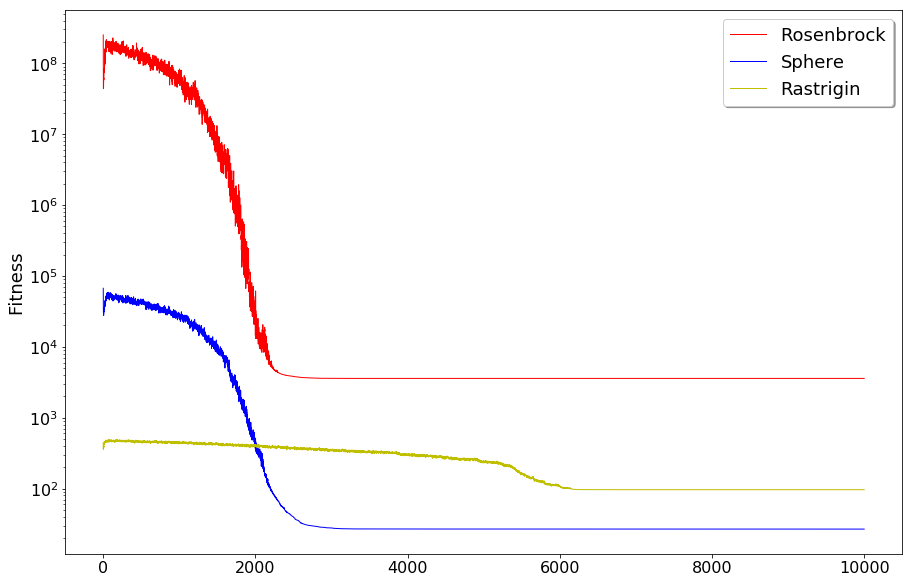

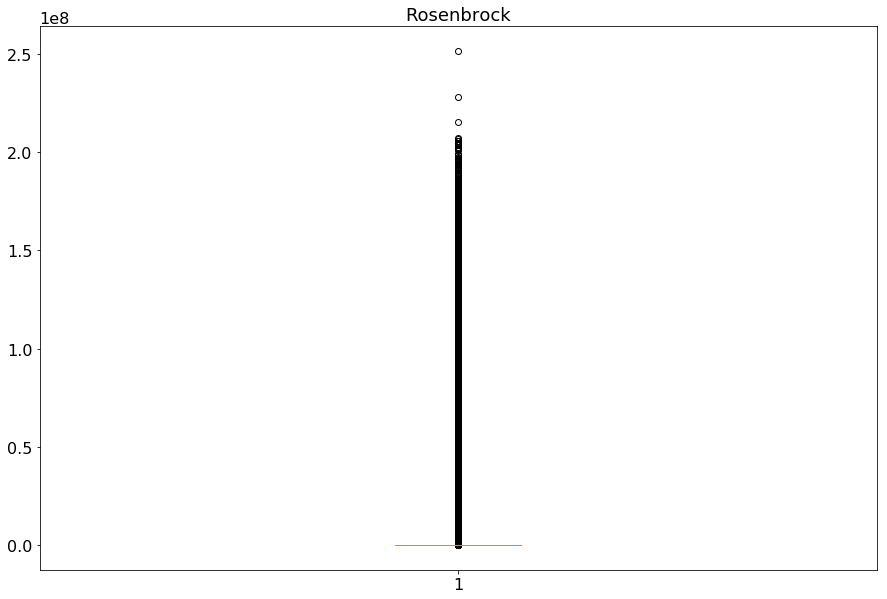

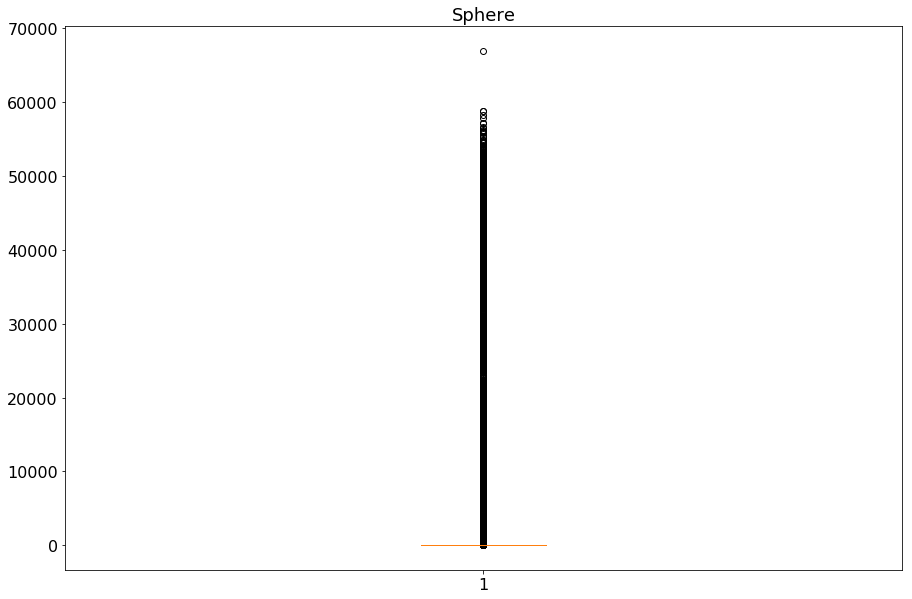

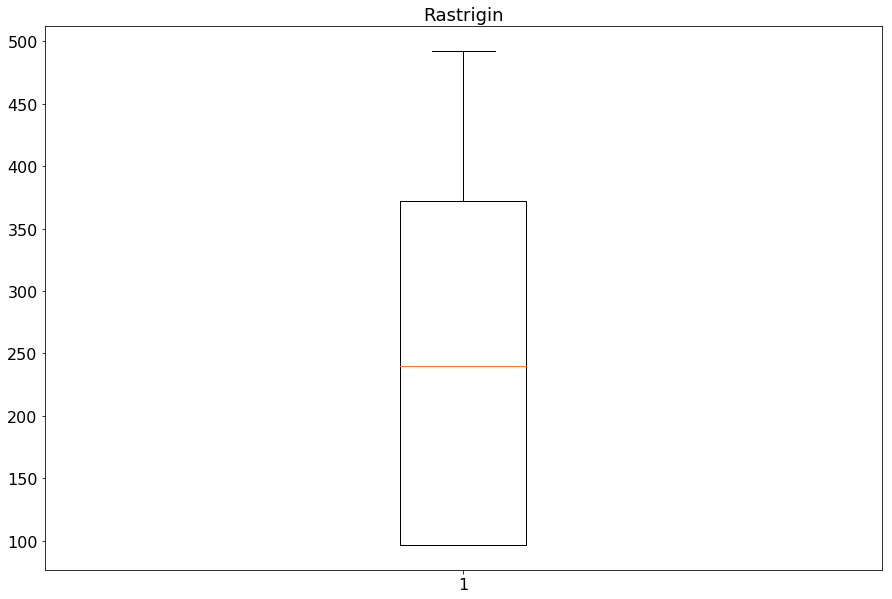

In [0]:
experiment(30)

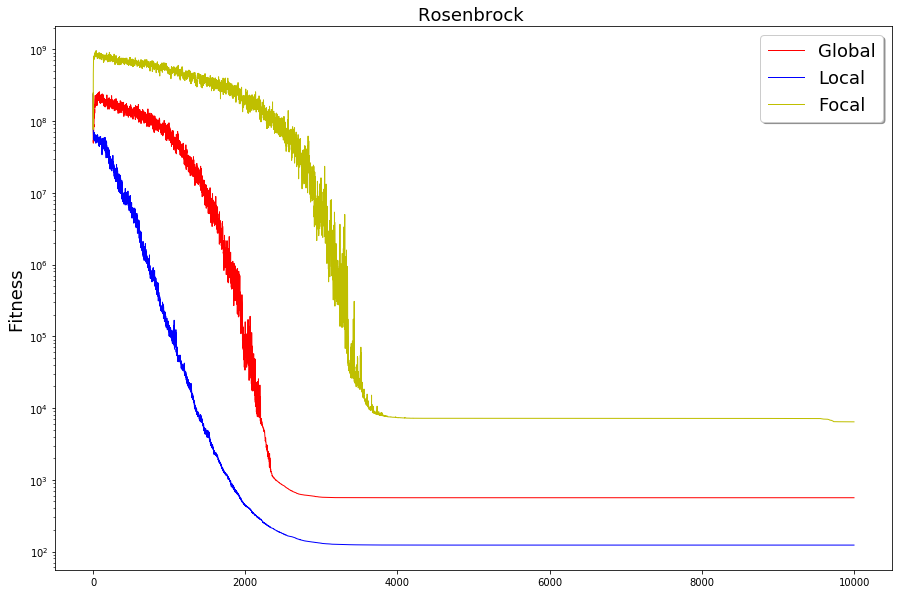

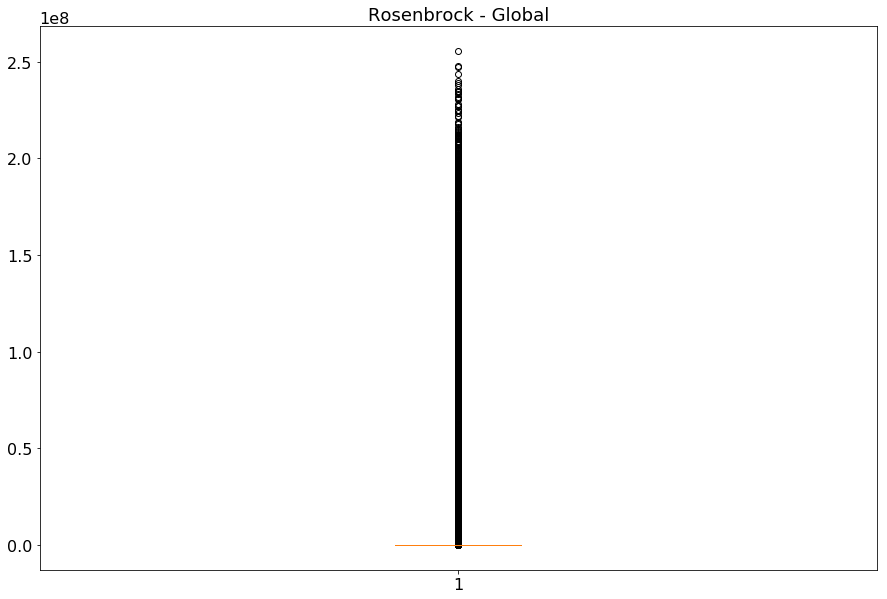

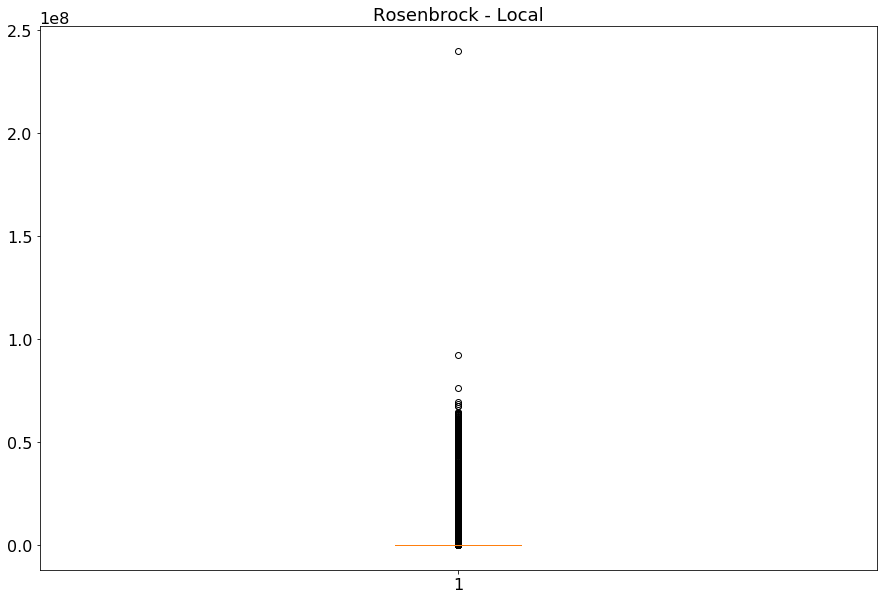

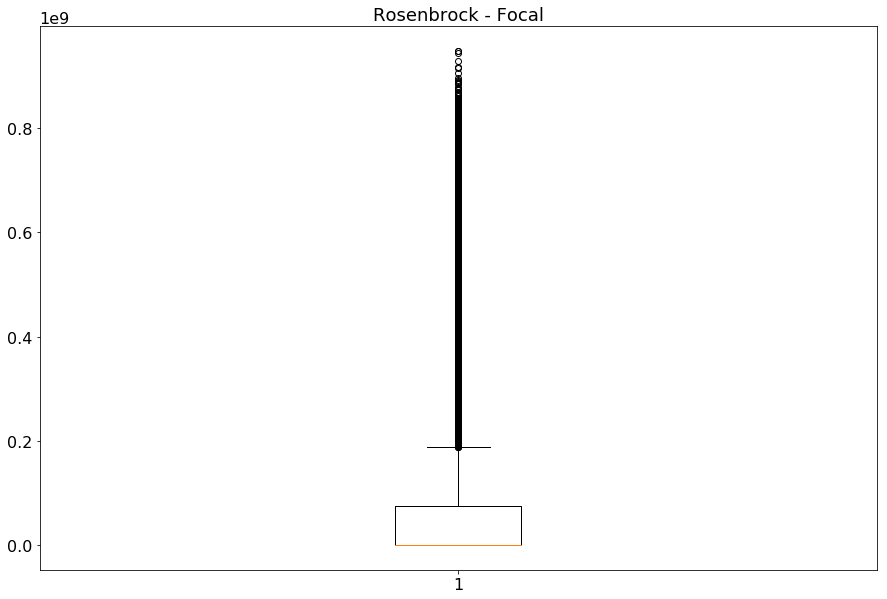

(array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
         9.99700000e+03, 9.99800000e+03, 9.99900000e+03],
        [2.34851176e+08, 7.36206371e+07, 5.17550464e+07, ...,
         5.61794712e+02, 5.61794712e+02, 5.61794712e+02]]),
 array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
         9.99700000e+03, 9.99800000e+03, 9.99900000e+03],
        [2.39688259e+08, 9.24324358e+07, 7.63139198e+07, ...,
         1.22880633e+02, 1.22880633e+02, 1.22880633e+02]]),
 array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
         9.99700000e+03, 9.99800000e+03, 9.99900000e+03],
        [2.45806259e+08, 7.62832406e+07, 3.56075034e+08, ...,
         6.41839584e+03, 6.41810083e+03, 6.41771050e+03]]))

In [13]:
experiment_topologia_rosen(30)

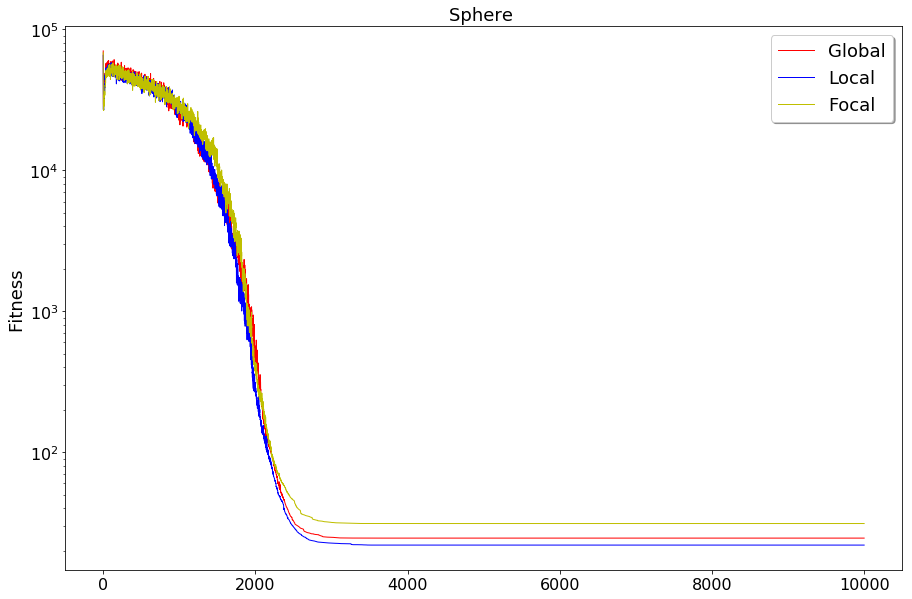

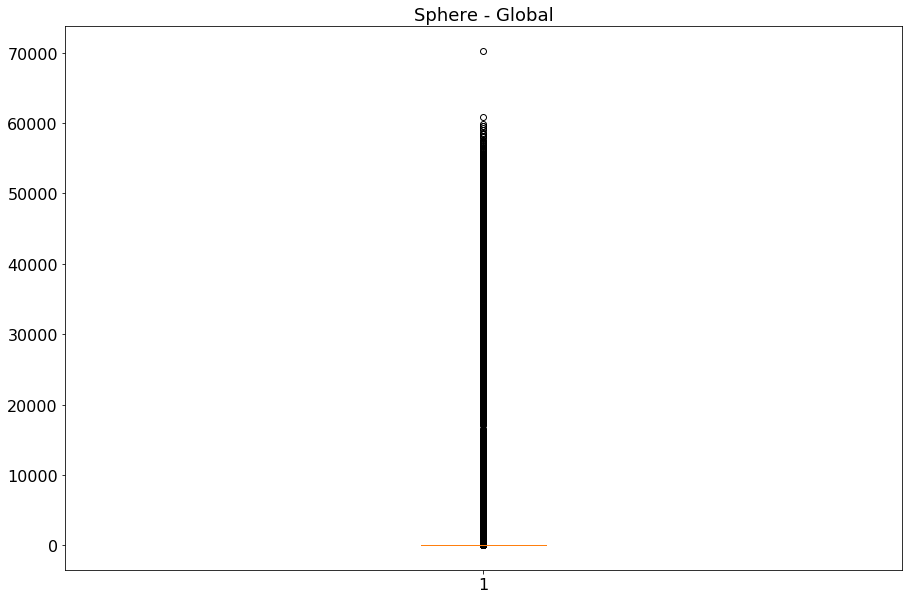

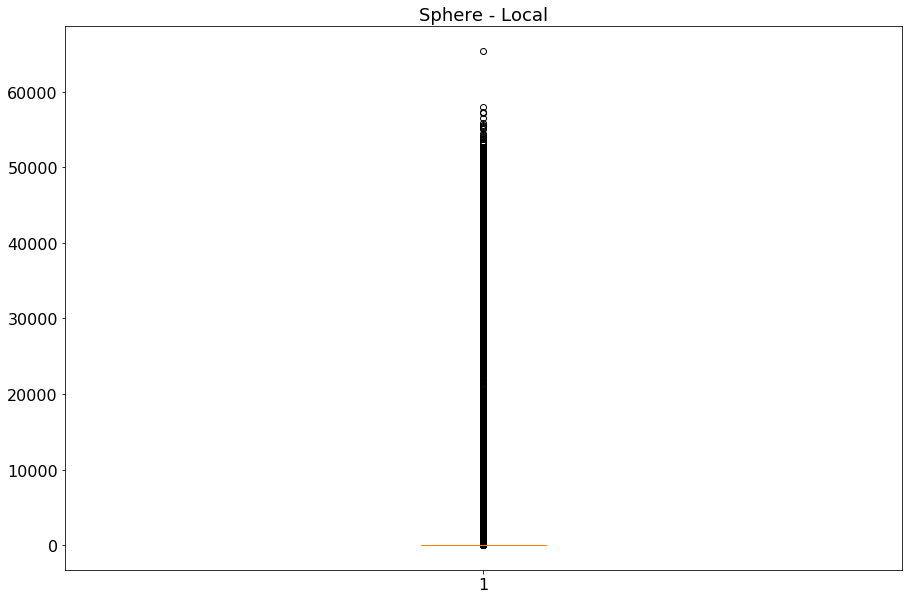

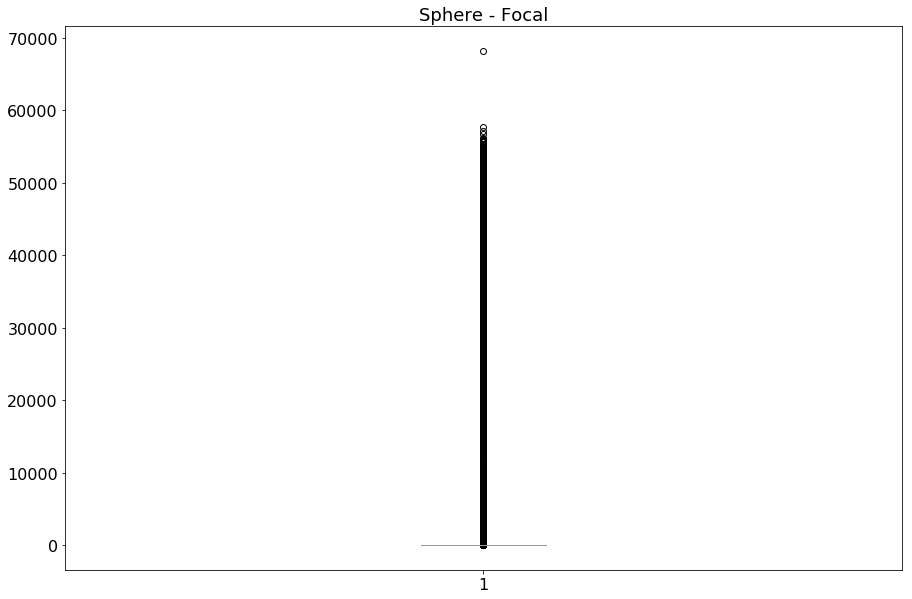

(array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
         9.99700000e+03, 9.99800000e+03, 9.99900000e+03],
        [7.02529483e+04, 3.44690133e+04, 2.97912506e+04, ...,
         2.45739952e+01, 2.45739952e+01, 2.45739952e+01]]),
 array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
         9.99700000e+03, 9.99800000e+03, 9.99900000e+03],
        [6.53827439e+04, 3.29771477e+04, 2.69102843e+04, ...,
         2.19248273e+01, 2.19248272e+01, 2.19248272e+01]]),
 array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
         9.99700000e+03, 9.99800000e+03, 9.99900000e+03],
        [6.82059705e+04, 3.28569914e+04, 2.94917337e+04, ...,
         3.11832937e+01, 3.11832937e+01, 3.11832937e+01]]))

In [17]:
experiment_topologia_sphere(30)

In [ ]:
experiment_topologia_rast(30)